In [1]:
import Pkg
Pkg.add("Revise")
Pkg.add("IonSim")
Pkg.add("QuantumOptics")
Pkg.add("StochasticDiffEq")
Pkg.add("DSP")
using PyPlot
using Revise
using IonSim
using QuantumOptics: timeevolution, stochastic, Basis

   Resolving package versions...
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Manifest.toml`
Precompiling project...
┌ Warning: attempting to remove probably stale pidfile
│   path = C:\Users\jewoo\.julia\compiled\v1.11\NonlinearSolveNLsolveExt\IOynl_6SIQg.ji.pidfile
└ @ FileWatching.Pidfile C:\Users\jewoo\.julia\juliaup\julia-1.11.6+0.x64.w64.mingw32\share\julia\stdlib\v1.11\FileWatching\src\pidfile.jl:249
┌ Warning: attempting to remove probably stale pidfile
│   path = C:\Users\jewoo\.julia\compiled\v1.11\OrdinaryDiffEqNonlinearSolve\jGadk_6SIQg.ji.pidfile
└ @ FileWatching.Pidfile C:\Users\jewoo\.julia\juliaup\julia-1.11.6+0.x64.w64.mingw32\share\julia\stdlib\v1.11\FileWatching\src\pidfile.jl:249
┌ Warning: attempting to remove probably stale pidfile
│   path = C:\Users\jewoo\.julia\compiled\v1.11\Plots\ld3vC_6SIQg.ji.pidfile
└ @ FileWatching.Pidfile C:\Users\jewoo\.julia\juliaup\julia-1.11.6+0.x64.

In [2]:
C = Ca40([("S1/2", -1/2, "g"),("D5/2", -1/2, "e")])
# Create aliases for the qubit states for easier access
#set_sublevel_alias!(C, Dict("g" => ("S1/2", -1/2), "e" => ("D5/2", -1/2)))

# Define the trap configuration. We'll model a single ion in a linear chain
# with a 1 MHz axial motional frequency.
chain = LinearChain(
    ions=[C],
    comfrequencies=(x=3e6, y=3e6, z=1e6),
    selectedmodes=(;z=[1]) # We only consider the axial mode of motion
)

# Define the laser that will drive the transition
L = Laser()

# Combine all components into a single Trap object, which represents the full experiment
# This is the main object that holds the entire state of our physical system.
T = Chamber(
    iontrap=chain,
    B=4e-4,              # Magnetic field in Tesla
    #δB = 0.1,
    Bhat=ẑ,              # Magnetic field direction
    lasers=[L]
)

polarization!(L, (x̂ - ẑ)/√2)
wavevector!(L, (x̂ + ẑ)/√2);
wavelength_from_transition!(L, C, ("g", "e"), T)
intensity_from_pitime!(L, 4e-6, C, ("g", "e"), T);

ion = ions(T)[1]

ψ0_ion_1 = ion["g"]
ψ0_ion_2 = ion[("S1/2", -1/2)]
ψ0_ion_3 = ionstate(ion, "g")

print(ψ0_ion_1)
mode = modes(T)[1]

ψ0_mode_1 = mode[0]
ψ0_mode_2 = fockstate(mode, 0)
ψ0_mode_3 = groundstate(mode)

print(ψ0_mode_1)
ψ₀ = ion["g"] ⊗ mode[0];

Ket(dim=2)
  basis: ⁴⁰Ca
 1.0 + 0.0im
 0.0 + 0.0imKet(dim=11)
  basis: VibrationalMode(ν=1.0e6, axis=ẑ, N=10)
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

In [3]:
function pulse(T:: Chamber , tspan, pitime)
    # Define the laser that will drive the transition
    L = T.lasers[1]

    # Combine all components into a single Trap object, which represents the full experiment
    # This is the main object that holds the entire state of our physical system.
    
    pi2_time = pitime*1e6/2

    res_intensity = intensity_from_pitime(L, pitime, T.iontrap.ions[1], ("g", "e"), T)

    function intensity_funtion(t)
    if(t<=pi2_time)
        return res_intensity
    elseif(t>=tspan[end] - pi2_time)
        return res_intensity
    else
        return 0.0
    end

    end
    intensity!(L, intensity_funtion)

    function phase_funtion(t)
        if(t<=pi2_time)
            return 2*pi
        elseif(t>=tspan[end] - pi2_time)
            return pi
        else
            return 0.0
        end
    end

    phase!(L, phase_funtion)
    h = hamiltonian(T, timescale=1e-6, rwa_cutoff=Inf);
    return h
end




# phase!(L, phase_funtion)
# h = hamiltonian(T, timescale=1e-6, rwa_cutoff=Inf);

pulse (generic function with 1 method)

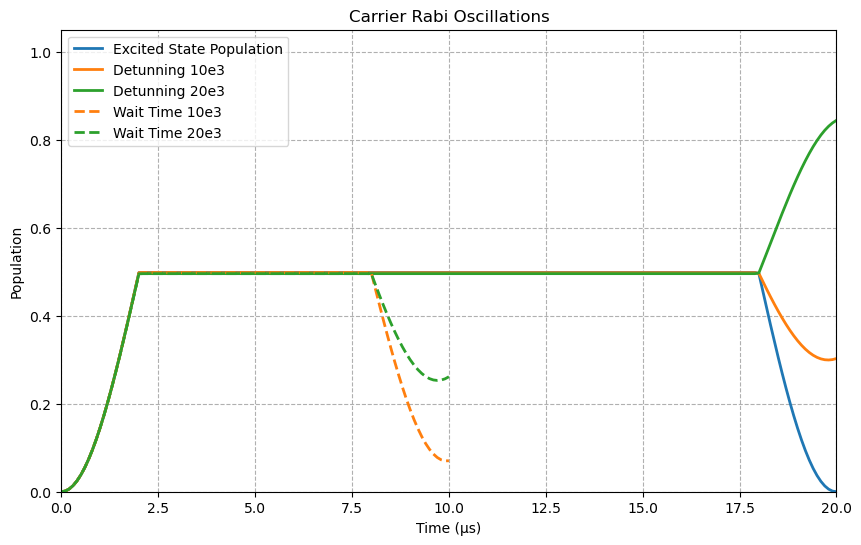

λ: 7.291469960190796e-7 m
Δ: 0 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 1.030939867952202e6 W/m²
ϕ(t=0): 1.0 ⋅ 2π
λ: 7.291469960190796e-7 m
Δ: 10000 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 1.030939867952202e6 W/m²
ϕ(t=0): 1.0 ⋅ 2π
λ: 7.291469960190796e-7 m
Δ: 20000 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 1.030939867952202e6 W/m²
ϕ(t=0): 1.0 ⋅ 2π
10.00.07035724716674818

In [39]:
tspan = 0:0.1:20
# Solve the time evolution using the Schrödinger equation solver from QuantumOptics.jl
h = pulse(T, tspan, 4e-6)
tout, sol = timeevolution.schroedinger_dynamic(tspan, ψ₀, h)


# 5. Analyze and Visualize the Results
# Calculate the population in the excited state |e⟩ over time
excited_pop = expect(ionprojector(T, "e"), sol)
print(L)



L1 = Laser()

# Combine all components into a single Trap object, which represents the full experiment
# This is the main object that holds the entire state of our physical system.
T1 = Chamber(
    iontrap=chain,
    B=4e-4,              # Magnetic field in Tesla
    #δB = 0.1,
    Bhat=ẑ,              # Magnetic field direction
    lasers=[L1]
)
polarization!(L1, (x̂ - ẑ)/√2)
wavevector!(L1, (x̂ + ẑ)/√2);
wavelength_from_transition!(L1, C, ("g", "e"), T1)
detuning!(L1, 10000)
h1 = pulse(T1, tspan, 4e-6)

tspan1 = 0:0.1:10
h1_wait = pulse(T1, tspan1, 4e-6)
tout1, sol1 = timeevolution.schroedinger_dynamic(tspan, ψ₀, h1)
excited_pop1 = expect(ionprojector(T1, "e"), sol1)

tout1_wait, sol1_wait = timeevolution.schroedinger_dynamic(tspan1, ψ₀, h1_wait)
excited_pop1_wait = expect(ionprojector(T1, "e"), sol1_wait)
print(L1)


L2 = Laser()

# Combine all components into a single Trap object, which represents the full experiment
# This is the main object that holds the entire state of our physical system.
T2 = Chamber(
    iontrap=chain,
    B=4e-4,              # Magnetic field in Tesla
    #δB = 0.1,
    Bhat=ẑ,              # Magnetic field direction
    lasers=[L2]
)
polarization!(L2, (x̂ - ẑ)/√2)
wavevector!(L2, (x̂ + ẑ)/√2);
wavelength_from_transition!(L2, C, ("g", "e"), T2)
detuning!(L2, 20000)

h2 = pulse(T2, tspan, 4e-6)

h2_wait = pulse(T2, tspan1, 4e-6)
tout2, sol2 = timeevolution.schroedinger_dynamic(tspan, ψ₀, h2)

excited_pop2 = expect(ionprojector(T2, "e"), sol2)

tout2_wait, sol2_wait = timeevolution.schroedinger_dynamic(tspan1, ψ₀, h2_wait)
excited_pop2_wait = expect(ionprojector(T2, "e"), sol2_wait)

print(L2)



# Create the plot using PyPlot
figure(figsize=(10, 6))
plot(tout, real.(excited_pop), label="Excited State Population", color="C0", linewidth=2)
plot(tout1, real.(excited_pop1), label="Detunning 10e3", color="C1", linewidth=2)
plot(tout2, real.(excited_pop2), label="Detunning 20e3", color="C2", linewidth=2)


plot(tout1_wait, real.(excited_pop1_wait), label="Wait Time 10e3", color="C1", linestyle="--", linewidth=2)
plot(tout2_wait, real.(excited_pop2_wait), label="Wait Time 20e3", color="C2", linestyle="--", linewidth=2)


xlim(0, 20)
xlabel("Time (μs)")
ylabel("Population")
title("Carrier Rabi Oscillations")
ylim(0, 1.05)
grid(true, linestyle="--")
legend()
display(gcf())
show()

figure(figsize=(20, 6))
print(tout1_wait[end], real.(excited_pop1_wait[end]))
scatter(tout1_wait[end], real.(excited_pop1_wait[end]))
#display(gcf())
show()

In [40]:
function plot_detune(n, detuning)
    L3 = Laser()

    # Combine all components into a single Trap object, which represents the full experiment
    # This is the main object that holds the entire state of our physical system.
    T3 = Chamber(
        iontrap=chain,
        B=4e-4,              # Magnetic field in Tesla
        #δB = 0.1,
        Bhat=ẑ,              # Magnetic field direction
        lasers=[L3]
    )
    polarization!(L3, (x̂ - ẑ)/√2)
    wavevector!(L3, (x̂ + ẑ)/√2);
    wavelength_from_transition!(L3, C, ("g", "e"), T3)
    detuning!(L3, detuning)

    h3 = pulse(T3, tspan, 4e-6)

    h3_wait = pulse(T3, tspan1, 4e-6)
    tout3, sol3 = timeevolution.schroedinger_dynamic(tspan, ψ₀, h3)

    excited_pop3 = expect(ionprojector(T3, "e"), sol3)

    tout3_wait, sol3_wait = timeevolution.schroedinger_dynamic(tspan1, ψ₀, h3_wait)
    excited_pop3_wait = expect(ionprojector(T3, "e"), sol3_wait)

    print(L3)
    
    plot(tout3, real.(excited_pop3), label="Detunning $detuning",  color="C$n", linewidth=2)
    plot(tout3_wait, real.(excited_pop3_wait), color="C$n", linestyle="--", linewidth=2)


end

plot_detune (generic function with 1 method)

λ: 7.291469960190796e-7 m
Δ: 0 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 1.030939867952202e6 W/m²
ϕ(t=0): 1.0 ⋅ 2π
λ: 7.291469960190796e-7 m
Δ: 1000 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 1.030939867952202e6 W/m²
ϕ(t=0): 1.0 ⋅ 2π
λ: 7.291469960190796e-7 m
Δ: 2000 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 1.030939867952202e6 W/m²
ϕ(t=0): 1.0 ⋅ 2π
λ: 7.291469960190796e-7 m
Δ: 3000 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 1.030939867952202e6 W/m²
ϕ(t=0): 1.0 ⋅ 2π
λ: 7.291469960190796e-7 m
Δ: 4000 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 1.030939867952202e6 W/m²
ϕ(t=0): 1.0 ⋅ 2π
λ: 

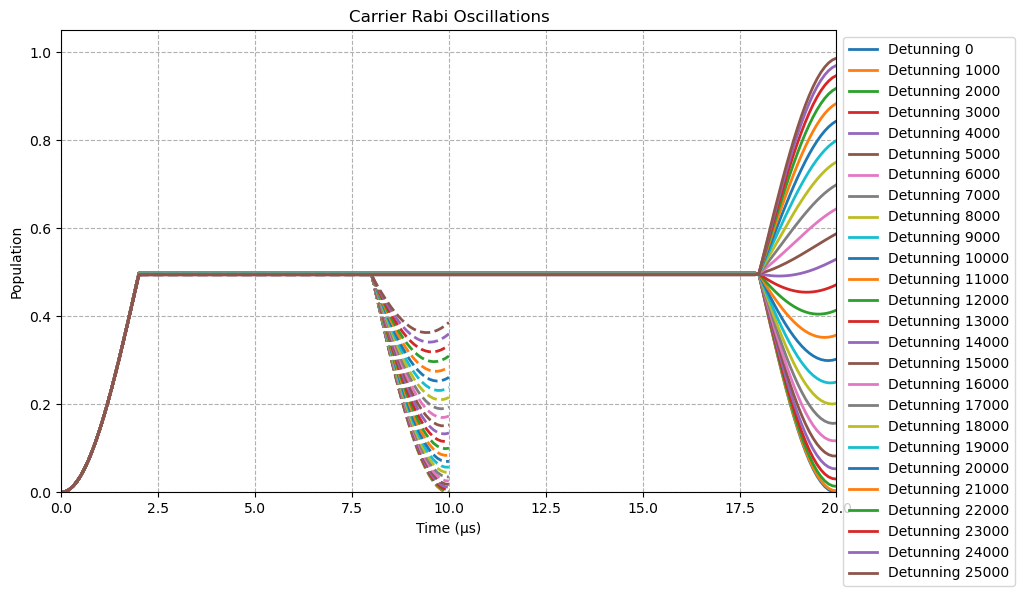

In [42]:
wait_span = 0:1000:25000
figure(figsize=(10, 6))
ct = 0
for w in wait_span
    plot_detune(ct, w)
    ct = ct+1
end
xlim(0, 20)
    xlabel("Time (μs)")
    ylabel("Population")
    title("Carrier Rabi Oscillations")
    ylim(0, 1.05)
    grid(true, linestyle="--")
    legend(loc="upper left", bbox_to_anchor=(1, 1))
    show()
    display(gcf())

In [17]:
using Pkg
Pkg.build("PyCall")

    Building Conda ─→ `C:\Users\jewoo\.julia\scratchspaces\44cfe95a-1eb2-52ea-b672-e2afdf69b78f\b19db3927f0db4151cb86d073689f2428e524576\build.log`
    Building PyCall → `C:\Users\jewoo\.julia\scratchspaces\44cfe95a-1eb2-52ea-b672-e2afdf69b78f\9816a3826b0ebf49ab4926e2b18842ad8b5c8f04\build.log`


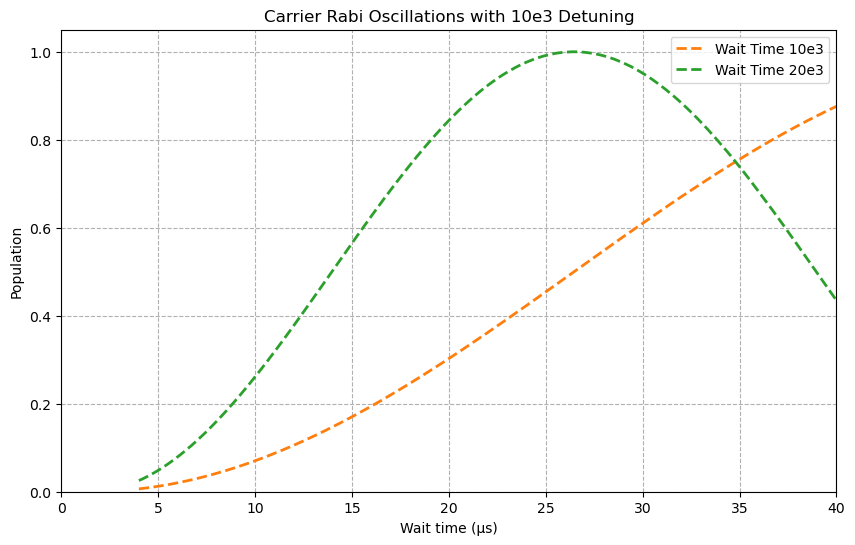

In [23]:
waittime = 4:0.1:40

figure(figsize=(10, 6))
cnt = 0
x = Float64[]
y = Float64[]

x1 = Float64[]
y1 = Float64[]
for wait in waittime
    tspan1 = 0:0.1:wait
    h1_wait = pulse(T1, tspan1, 4e-6)
    tout1_wait, sol1_wait = timeevolution.schroedinger_dynamic(tspan1, ψ₀, h1_wait)
    excited_pop1_wait = expect(ionprojector(T1, "e"), sol1_wait)
    
    push!(x, tout1_wait[end])
    push!(y, real(excited_pop1_wait[end]))

    h2_wait = pulse(T2, tspan1, 4e-6)
    tout2_wait, sol2_wait = timeevolution.schroedinger_dynamic(tspan1, ψ₀, h2_wait)
    excited_pop2_wait = expect(ionprojector(T2, "e"), sol2_wait)
    push!(x1, tout2_wait[end])
    push!(y1, real(excited_pop2_wait[end]))
   # scatter(tout1_wait[end], real.(excited_pop1_wait[end]), label="Wait Time $(wait)", color="C1", linestyle="--", linewidth=2)
end
xlim(0, 40)
xlabel("Wait time (μs)")
ylabel("Population")
title("Carrier Rabi Oscillations with 10e3 Detuning")
ylim(0, 1.05)
plot(x, y, label="Wait Time 10e3", color="C1", linestyle="--", linewidth=2)
plot(x1, y1, label="Wait Time 20e3", color="C2", linestyle="--", linewidth=2)
grid(true, linestyle="--")
legend()
show()
display(gcf())
